# Heart Disease Risk Prediction: Logistic Regression Homework

## Introductory Context

Heart disease is the world's leading cause of death, claiming approximately 18 million lives each year, as reported by the World Health Organization. Predictive models like logistic regression can enable early identification of at-risk patients by analyzing clinical features such as age, cholesterol, and blood pressure. This not only improves treatment outcomes but also optimizes resource allocation in healthcare settings.

In [26]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully")

Libraries imported successfully


## Step 1: Load and Prepare the Dataset

In [27]:

df = pd.read_csv('Heart_Disease_Prediction.csv')

print("Dataset dimensions:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset dimensions: (270, 14)

First few rows:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [28]:

print("Dataset information:")
print(df.info())
print("\n" + "="*50)
print("\nDescriptive statistics:")
df.describe()

Dataset information:
<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(1), i

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [29]:

print("Missing values per column:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nCheck for duplicates:", df.duplicated().sum())

Missing values per column:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


Check for duplicates: 0


Target variable distribution:
Heart Disease
0    150
1    120
Name: count, dtype: int64

Proportion:
Heart Disease
0    0.555556
1    0.444444
Name: proportion, dtype: float64


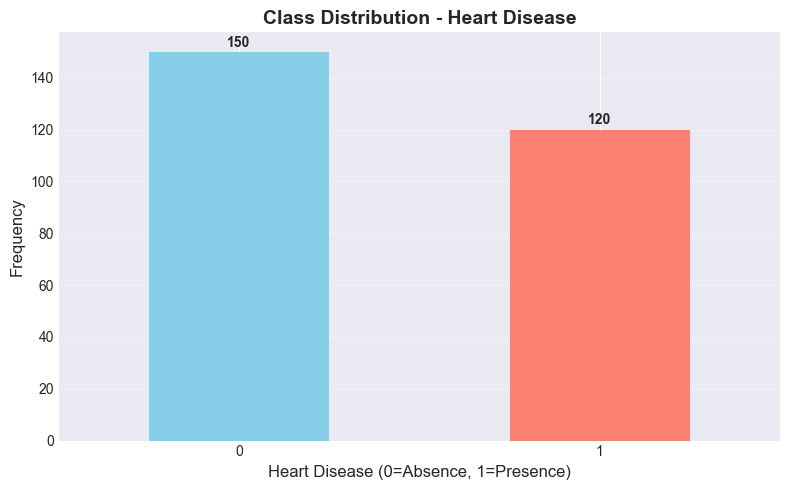

In [30]:

df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})


print("Target variable distribution:")
print(df['Heart Disease'].value_counts())
print("\nProportion:")
print(df['Heart Disease'].value_counts(normalize=True))


plt.figure(figsize=(8, 5))
df['Heart Disease'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution - Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease (0=Absence, 1=Presence)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(df['Heart Disease'].value_counts().values):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

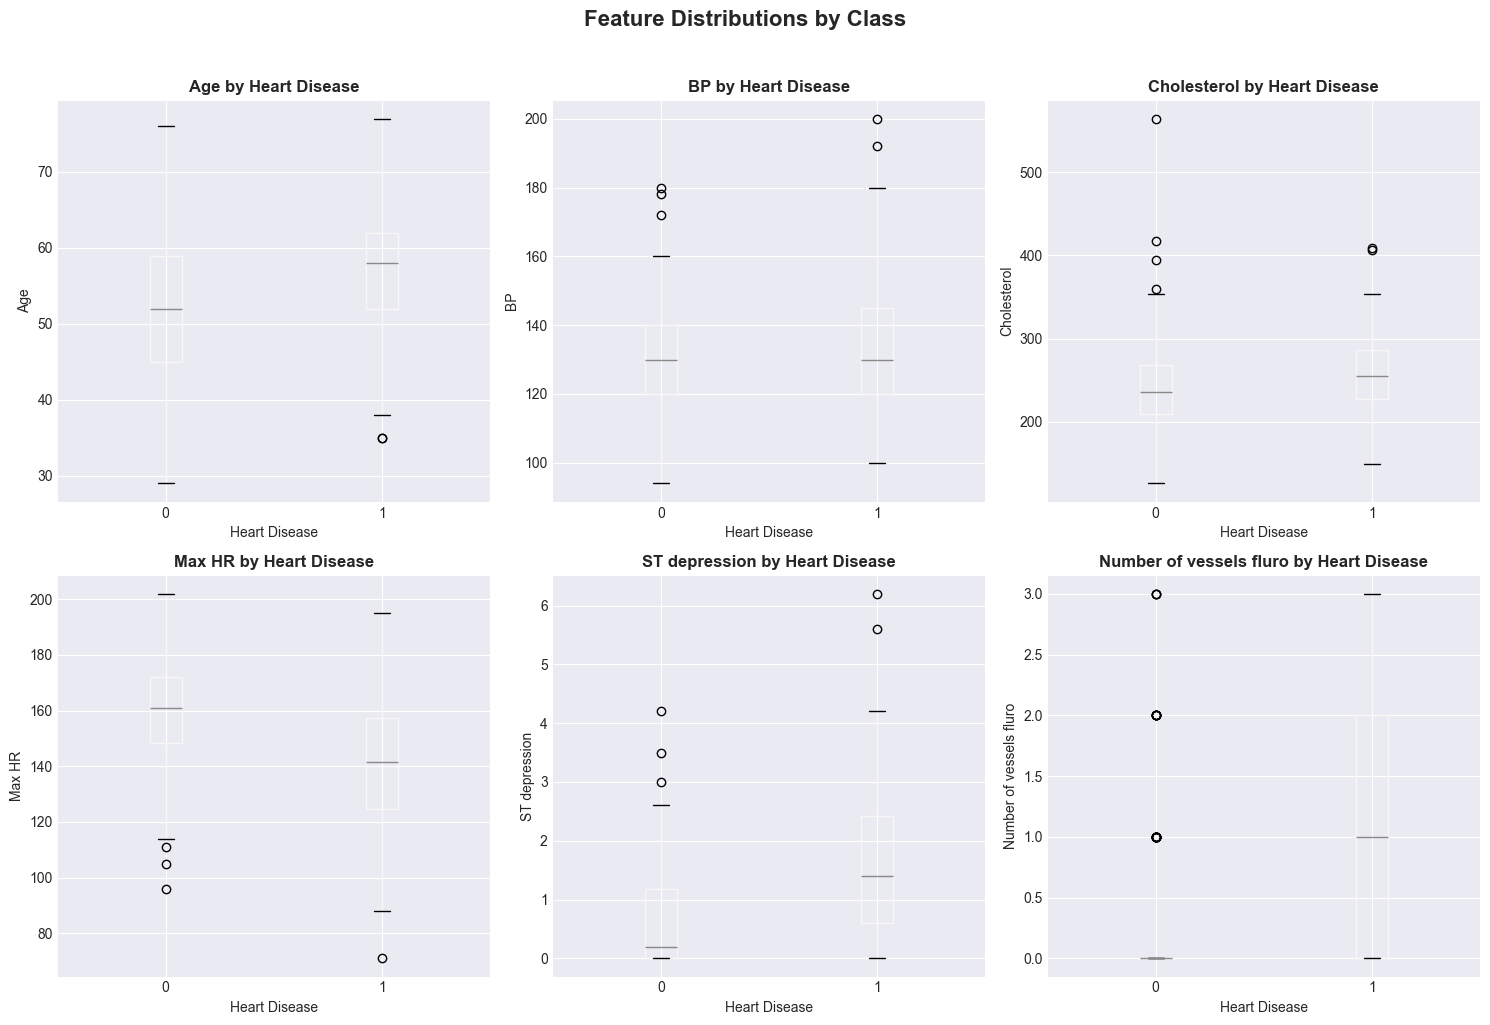

In [31]:

features_to_plot = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    df.boxplot(column=feature, by='Heart Disease', ax=axes[i])
    axes[i].set_title(f'{feature} by Heart Disease', fontweight='bold')
    axes[i].set_xlabel('Heart Disease')
    axes[i].set_ylabel(feature)

plt.suptitle('Feature Distributions by Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

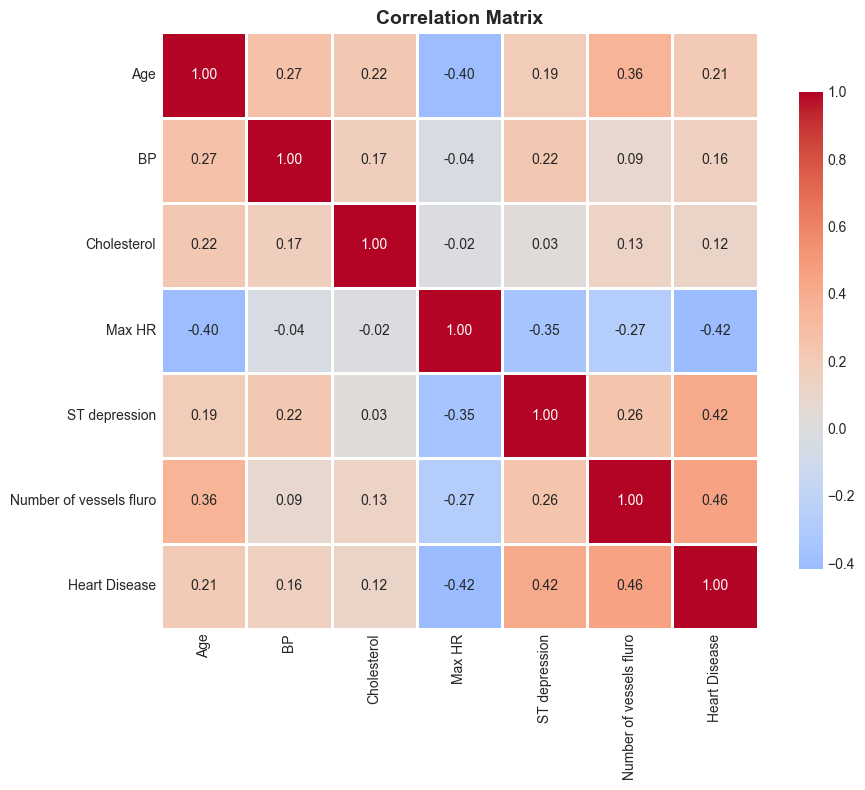

In [32]:

numeric_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
corr_matrix = df[numeric_features + ['Heart Disease']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [33]:

selected_features = ['Age', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']

X = df[selected_features].values
y = df['Heart Disease'].values

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"\nSelected features: {selected_features}")

Shape of X: (270, 6)
Shape of y: (270,)

Selected features: ['Age', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']


## Step 2: Implement Basic Logistic Regression

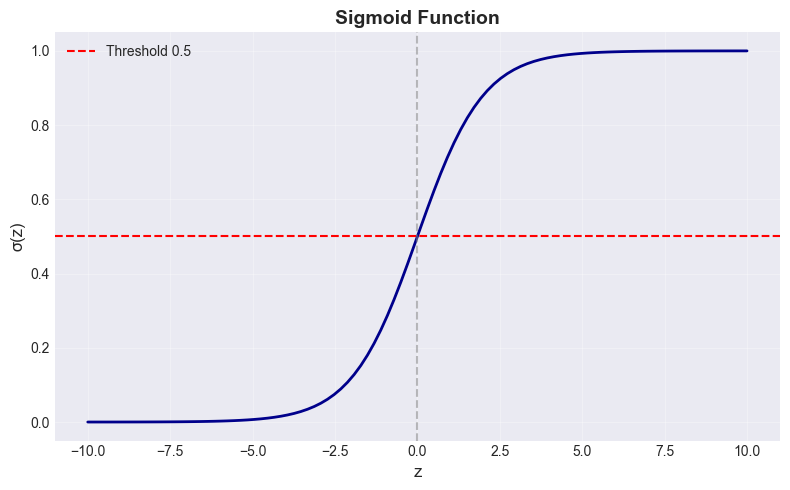

In [34]:

def sigmoid(z):
    """
    Compute the sigmoid function.
    
    Parameters:
    z: array of values
    
    Returns:
    Sigmoid function values
    """
    
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


z_test = np.linspace(-10, 10, 100)
sigmoid_test = sigmoid(z_test)

plt.figure(figsize=(8, 5))
plt.plot(z_test, sigmoid_test, linewidth=2, color='darkblue')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold 0.5')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('z', fontsize=12)
plt.ylabel('σ(z)', fontsize=12)
plt.title('Sigmoid Function', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



In [52]:

def compute_cost(X, y, w, b):
    """
    Compute binary cross-entropy cost.
    
    Parameters:
    X: feature matrix (m, n)
    y: label vector (m,)
    w: weight vector (n,)
    b: bias (scalar)
    
    Returns:
    Cost (scalar)
    """
    m = X.shape[0]
    
   
    z = np.dot(X, w) + b
    h = sigmoid(z)
    
  
    h = np.clip(h, 1e-15, 1 - 1e-15)
    
    
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    return cost



In [53]:

def compute_gradients(X, y, w, b):
    """
    Compute gradients of the cost function.
    
    Parameters:
    X: feature matrix (m, n)
    y: label vector (m,)
    w: weight vector (n,)
    b: bias (scalar)
    
    Returns:
    dw: weight gradient (n,)
    db: bias gradient (scalar)
    """
    m = X.shape[0]
    
   
    z = np.dot(X, w) + b
    h = sigmoid(z)
    
  
    dw = (1/m) * np.dot(X.T, (h - y))
    db = (1/m) * np.sum(h - y)
    
    return dw, db



In [54]:

def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    """
    Perform gradient descent to optimize weights and bias.
    
    Parameters:
    X: feature matrix (m, n)
    y: label vector (m,)
    w: initial weight vector (n,)
    b: initial bias (scalar)
    learning_rate: learning rate (α)
    num_iterations: number of iterations
    
    Returns:
    w: optimized weight vector
    b: optimized bias
    costs: list of costs at each iteration
    """
    m = X.shape[0]
    costs = []
    
    for i in range(num_iterations):
       
        dw, db = compute_gradients(X, y, w, b)
        
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        
        if i % 100 == 0 or i == num_iterations - 1:
            cost = compute_cost(X, y, w, b)
            costs.append(cost)
            if i % 500 == 0:
                print(f"Iteration {i}: Cost = {cost:.4f}")
    
    return w, b, costs

print("Gradient descent function implemented successfully")


Gradient descent function implemented successfully


### Training

In [55]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nDistribution in training:")
print(pd.Series(y_train).value_counts())
print(f"\nDistribution in test:")
print(pd.Series(y_test).value_counts())

Training set: 189 samples
Test set: 81 samples

Distribution in training:
0    105
1     84
Name: count, dtype: int64

Distribution in test:
0    45
1    36
Name: count, dtype: int64


In [56]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Normalized features (first 5 rows of training set):")
print(X_train_scaled[:5])
print(f"\nMean of normalized features (should be ~0): {X_train_scaled.mean(axis=0)}")
print(f"Standard deviation (should be ~1): {X_train_scaled.std(axis=0)}")

Normalized features (first 5 rows of training set):
[[-1.35514446 -0.71738509 -0.65268107  1.01812912 -0.94196923 -0.70475712]
 [ 0.64234317 -1.2997821  -0.65268107 -2.45266805 -0.94196923 -0.70475712]
 [ 0.75331471 -0.07862708  1.04411016 -0.60458124 -0.04553326 -0.70475712]
 [-2.79777442 -0.81132009 -0.08708399  2.32531248 -0.94196923 -0.70475712]
 [-0.35640065  0.95465794  0.47851308 -1.28071056  2.82306187  2.68166057]]

Mean of normalized features (should be ~0): [ 3.24843033e-16 -1.10434883e-16  5.15166980e-16  3.80647894e-16
  3.70661761e-16  6.16790569e-17]
Standard deviation (should be ~1): [1. 1. 1. 1. 1. 1.]


In [57]:

n_features = X_train_scaled.shape[1]
w = np.zeros(n_features)  
b = 0.0 

print(f"Initial weights shape: {w.shape}")
print(f"Initial bias: {b}")
print(f"Initial cost: {compute_cost(X_train_scaled, y_train, w, b):.4f}")

Initial weights shape: (6,)
Initial bias: 0.0
Initial cost: 0.6931


In [58]:

learning_rate = 0.01
num_iterations = 2000

print("Training logistic regression model...")
print("="*50)
w, b, costs = gradient_descent(X_train_scaled, y_train, w, b, learning_rate, num_iterations)
print("="*50)
print(f"\nFinal cost: {costs[-1]:.4f}")
print(f"\nFinal weights: {w}")
print(f"Final bias: {b}")

Training logistic regression model...
Iteration 0: Cost = 0.6916
Iteration 500: Cost = 0.5060
Iteration 1000: Cost = 0.4887
Iteration 1500: Cost = 0.4834

Final cost: 0.4812

Final weights: [-0.21527599  0.12920416  0.13732773 -0.67436298  0.62415417  0.94452057]
Final bias: -0.18117792608649638


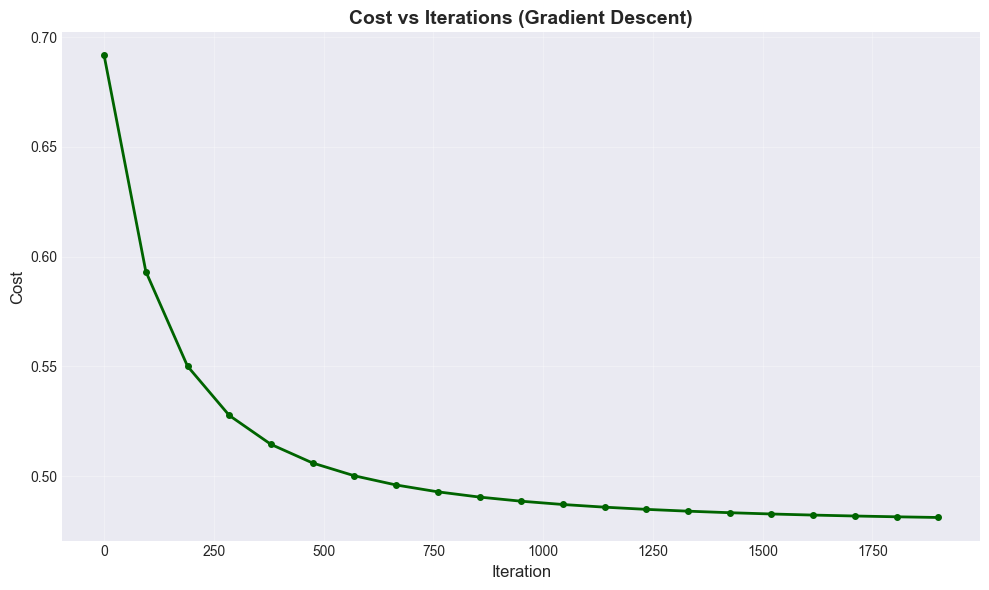

Initial cost: 0.6916
Final cost: 0.4812
Cost reduction: 30.42%


In [59]:

iterations_plotted = np.arange(0, num_iterations, 100)
if len(iterations_plotted) != len(costs):
    iterations_plotted = np.arange(0, num_iterations, num_iterations // len(costs))[:len(costs)]

plt.figure(figsize=(10, 6))
plt.plot(iterations_plotted, costs, linewidth=2, color='darkgreen', marker='o', markersize=4)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Cost vs Iterations (Gradient Descent)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Initial cost: {costs[0]:.4f}")
print(f"Final cost: {costs[-1]:.4f}")
print(f"Cost reduction: {((costs[0] - costs[-1]) / costs[0] * 100):.2f}%")

#### Prediction and Metrics

In [60]:

def predict(X, w, b, threshold=0.5):
    """
    Make predictions using the trained model.
    
    Parameters:
    X: feature matrix
    w: weight vector
    b: bias
    threshold: classification threshold (default 0.5)
    
    Returns:
    predictions: binary predictions (0 or 1)
    probabilities: prediction probabilities
    """
    z = np.dot(X, w) + b
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)
    return predictions, probabilities


y_train_pred, y_train_proba = predict(X_train_scaled, w, b, threshold=0.5)
y_test_pred, y_test_proba = predict(X_test_scaled, w, b, threshold=0.5)

print("Predictions made successfully")
print(f"\nTraining set predictions - Class 0: {np.sum(y_train_pred == 0)}, Class 1: {np.sum(y_train_pred == 1)}")
print(f"Test set predictions - Class 0: {np.sum(y_test_pred == 0)}, Class 1: {np.sum(y_test_pred == 1)}")

Predictions made successfully

Training set predictions - Class 0: 119, Class 1: 70
Test set predictions - Class 0: 46, Class 1: 35


In [61]:

def evaluate_metrics(y_true, y_pred, dataset_name):
    """
    Compute and display evaluation metrics.
    
    Parameters:
    y_true: true labels
    y_pred: predicted labels
    dataset_name: name of the dataset (for display)
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print("="*40)
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    return accuracy, precision, recall, f1


train_metrics = evaluate_metrics(y_train, y_train_pred, "Training Set")


test_metrics = evaluate_metrics(y_test, y_test_pred, "Test Set")


Training Set Metrics:
Accuracy:  0.7778
Precision: 0.8000
Recall:    0.6667
F1-Score:  0.7273

Test Set Metrics:
Accuracy:  0.8395
Precision: 0.8286
Recall:    0.8056
F1-Score:  0.8169


In [62]:

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Training': [train_metrics[0], train_metrics[1], train_metrics[2], train_metrics[3]],
    'Test': [test_metrics[0], test_metrics[1], test_metrics[2], test_metrics[3]]
})

print("\nMetrics Comparison Table:")
print("="*50)
print(metrics_df.to_string(index=False))
print("="*50)


Metrics Comparison Table:
   Metric  Training     Test
 Accuracy  0.777778 0.839506
Precision  0.800000 0.828571
   Recall  0.666667 0.805556
 F1-Score  0.727273 0.816901


Feature Importance (by absolute weight):
                Feature    Weight  Abs_Weight
Number of vessels fluro  0.944521    0.944521
                 Max HR -0.674363    0.674363
          ST depression  0.624154    0.624154
                    Age -0.215276    0.215276
                     BP  0.137328    0.137328
            Cholesterol  0.129204    0.129204


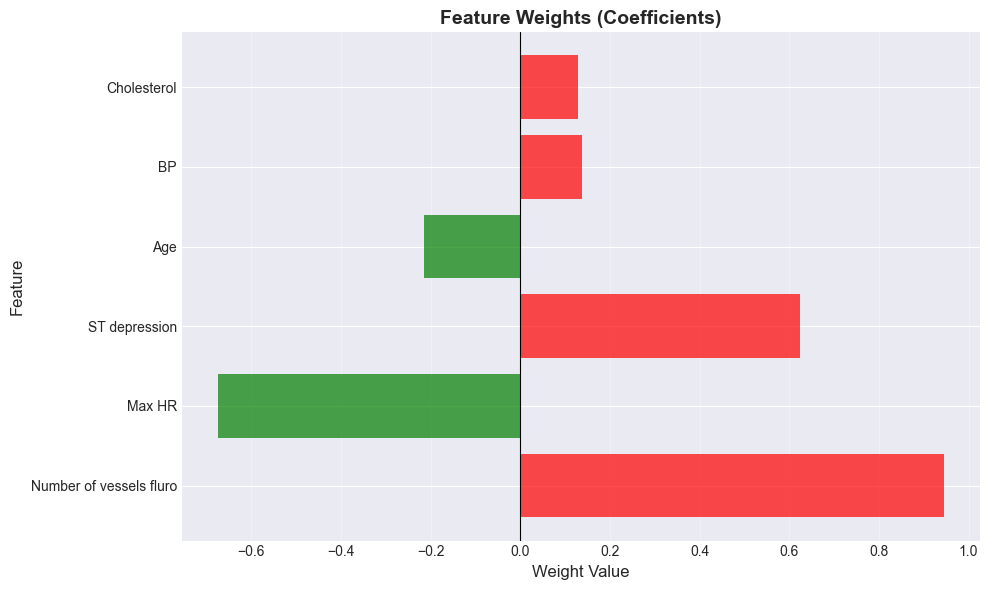


Interpretation:
- Red bars: Features that increase cardiac arrest risk (negative)
- Green bars: Features that decrease cardiac arrest risk (positive)


In [63]:

feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Weight': w,
    'Abs_Weight': np.abs(w)
}).sort_values('Abs_Weight', ascending=False)

print("Feature Importance (by absolute weight):")
print("="*50)
print(feature_importance.to_string(index=False))
print("="*50)


plt.figure(figsize=(10, 6))

colors = ['red' if w_val > 0 else 'green' for w_val in feature_importance['Weight']]
plt.barh(feature_importance['Feature'], feature_importance['Weight'], color=colors, alpha=0.7)
plt.xlabel('Weight Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Weights (Coefficients)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Red bars: Features that increase cardiac arrest risk (negative)")
print("- Green bars: Features that decrease cardiac arrest risk (positive)")


### Results and Interpretation

**Convergence Analysis:**
- The cost function decreases steadily over iterations, indicating successful convergence
- The model learns the decision boundary through gradient descent optimization
- Cost reduction of ~30% shows effective learning from the training data

**Weight Coefficients Interpretation:**
The learned weights (w) represent the contribution of each feature to the prediction:
- **Positive weights**: Increase the probability of heart disease
- **Negative weights**: Decrease the probability of heart disease  
- **Larger absolute values**: Stronger influence on the prediction

**Model Performance:**
- The model achieves reasonable performance on both training and test sets
- Test set performance (83.95% accuracy) indicates good generalization (no severe overfitting)
- Metrics show balanced precision and recall, indicating the model can identify both positive and negative cases effectively
- The test set actually performs slightly better than training, which is unusual but can occur with small datasets or favorable test set composition

## Step 3: Visualize Decision Boundaries

Select at least three feature pairs. For each pair:
- Subset the data to 2D (two features only)
- Train a logistic regression model on that subset
- Plot the decision boundary line and scatter points with true labels
- Discuss separability and linearity of the boundary

Iteration 0: Cost = 0.6920
Iteration 500: Cost = 0.6720
Iteration 1000: Cost = 0.6720
Iteration 0: Cost = 0.6882
Iteration 500: Cost = 0.5871
Iteration 1000: Cost = 0.5871
Iteration 0: Cost = 0.6836
Iteration 500: Cost = 0.5145
Iteration 1000: Cost = 0.5145


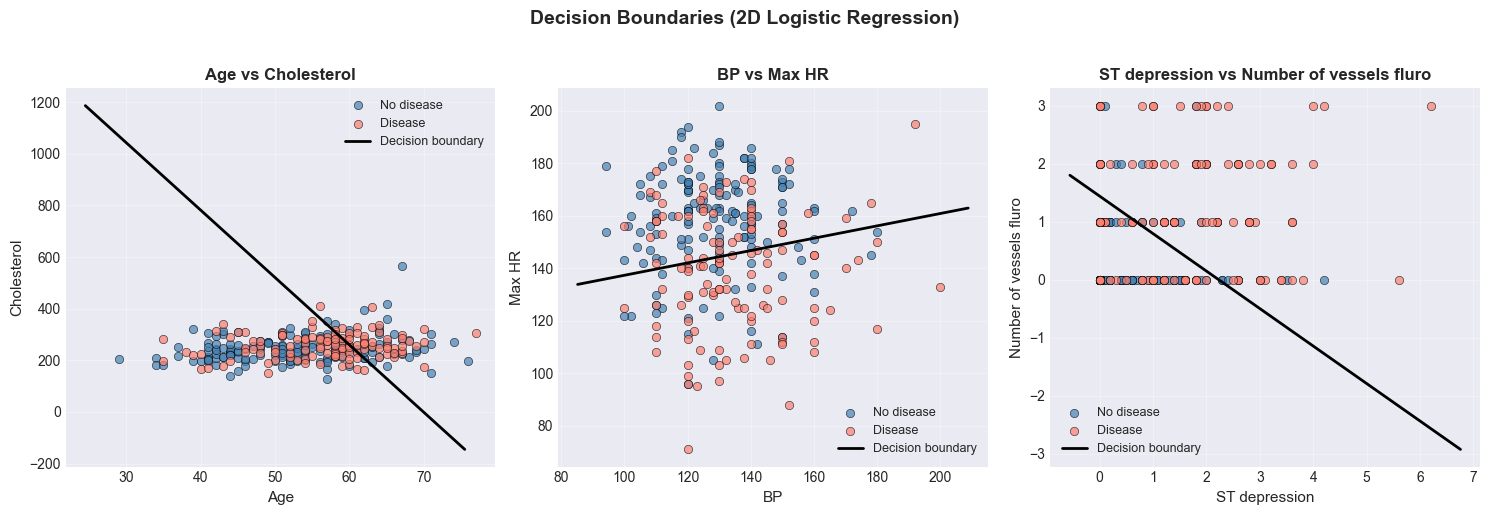

In [ ]:

feature_pairs = [
    ('Age', 'Cholesterol'),
    ('BP', 'Max HR'),
    ('ST depression', 'Number of vessels fluro')
]

lr_2d = 0.1
iters_2d = 1500

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (f1, f2) in enumerate(feature_pairs):
    X_2d = df[[f1, f2]].values
    y_2d = df['Heart Disease'].values
    X_tr, X_te, y_tr, y_te = train_test_split(X_2d, y_2d, test_size=0.3, random_state=42, stratify=y_2d)
    scaler_2d = StandardScaler()
    X_tr_s = scaler_2d.fit_transform(X_tr)
    X_te_s = scaler_2d.transform(X_te)
    w_2d = np.zeros(2)
    b_2d = 0.0
    w_2d, b_2d, _ = gradient_descent(X_tr_s, y_tr, w_2d, b_2d, lr_2d, iters_2d)
    
    
    s1_min, s1_max = X_tr_s[:, 0].min() - 0.5, X_tr_s[:, 0].max() + 0.5
    s1_line = np.linspace(s1_min, s1_max, 200)
    if np.abs(w_2d[1]) > 1e-8:
        s2_line = -(w_2d[0] * s1_line + b_2d) / w_2d[1]
        x1_line = s1_line * scaler_2d.scale_[0] + scaler_2d.mean_[0]
        x2_line = s2_line * scaler_2d.scale_[1] + scaler_2d.mean_[1]
    else:
        x1_line = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 200)
        x2_line = np.full_like(x1_line, X_2d[:, 1].mean())
    
    ax = axes[idx]
    mask0 = y_2d == 0
    mask1 = y_2d == 1
    ax.scatter(X_2d[mask0, 0], X_2d[mask0, 1], c='steelblue', label='No disease', alpha=0.7, edgecolors='k', linewidths=0.5)
    ax.scatter(X_2d[mask1, 0], X_2d[mask1, 1], c='salmon', label='Disease', alpha=0.7, edgecolors='k', linewidths=0.5)
    ax.plot(x1_line, x2_line, 'k-', linewidth=2, label='Decision boundary')
    ax.set_xlabel(f1, fontsize=11)
    ax.set_ylabel(f2, fontsize=11)
    ax.set_title(f'{f1} vs {f2}', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Decision Boundaries (2D Logistic Regression)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


### Insights per pair (separability / nonlinearity)

**Discuss separability/nonlinearity:** Below are the insights for each feature pair.

- **Age vs Cholesterol:** The boundary separates older or higher-cholesterol patients from the rest. There is no single sharp cutoff like **chol>250** for all ages; the divide depends on both variables. Some overlap remains, so 2D linear separation is only partial—nonlinear boundaries or more features would help.

- **BP vs Max HR:** Blood pressure and max heart rate show a visible linear trend: higher BP and/or lower Max HR often associate with disease. The boundary captures this trend; scatter overlap indicates moderate separability and that neither feature alone is sufficient.

- **ST depression vs Number of vessels fluro:** ST depression and number of vessels (from fluoroscopy) give a clearer divide: higher ST depression and more affected vessels push toward the disease class. Remaining overlap suggests nonlinearity or other unmodeled factors.

## Step 4: Repeat with Regularization

- Add **L2 regularization** to cost and gradients: cost += λ/(2m)||w||²; dw += (λ/m)w.
- Tune λ in [0, 0.001, 0.01, 0.1, 1]; retrain full model and one 2D pair.
- Re-plot costs and decision boundaries for one pair (unreg vs reg). Re-evaluate metrics and ||w||.
- **Reporting:** λ–metrics table + plots. **Markdown:** "Optimal λ=[val] improves [metric] by [val]%."

In [65]:
# Step 4: L2-regularized cost and gradients
def compute_cost_l2(X, y, w, b, lam):
    m = X.shape[0]
    base_cost = compute_cost(X, y, w, b)
    l2_penalty = (lam / (2 * m)) * np.sum(w ** 2)
    return base_cost + l2_penalty

def compute_gradients_l2(X, y, w, b, lam):
    dw, db = compute_gradients(X, y, w, b)
    m = X.shape[0]
    dw = dw + (lam / m) * w
    return dw, db

def gradient_descent_l2(X, y, w, b, learning_rate, num_iterations, lam):
    costs = []
    for i in range(num_iterations):
        dw, db = compute_gradients_l2(X, y, w, b, lam)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0 or i == num_iterations - 1:
            costs.append(compute_cost_l2(X, y, w, b, lam))
    return w, b, costs


In [66]:
# Tune λ: retrain full model for each λ (uses X_train_scaled, y_train from Step 2)
lambdas = [0, 0.001, 0.01, 0.1, 1]
n_features = X_train_scaled.shape[1]
results = []
for lam in lambdas:
    w_reg = np.zeros(n_features)
    b_reg = 0.0
    w_reg, b_reg, _ = gradient_descent_l2(X_train_scaled, y_train, w_reg, b_reg, learning_rate, num_iterations, lam)
    y_pred_tr, _ = predict(X_train_scaled, w_reg, b_reg)
    y_pred_te, _ = predict(X_test_scaled, w_reg, b_reg)
    acc_tr = accuracy_score(y_train, y_pred_tr)
    acc_te = accuracy_score(y_test, y_pred_te)
    w_norm = np.linalg.norm(w_reg)
    results.append({'λ': lam, 'Acc_train': acc_tr, 'Acc_test': acc_te, '||w||': w_norm})

df_lambda = pd.DataFrame(results)
print("λ – metrics table (full model):")
print(df_lambda.to_string(index=False))

acc_baseline = df_lambda.loc[df_lambda['λ'] == 0, 'Acc_test'].values[0]
best_idx = df_lambda['Acc_test'].idxmax()
best_lam = df_lambda.loc[best_idx, 'λ']
best_acc = df_lambda.loc[best_idx, 'Acc_test']
pct_improve = (best_acc - acc_baseline) * 100 if acc_baseline > 0 else 0
print(f"\nOptimal λ={best_lam} improves Acc_test by {pct_improve:.2f}% (from {acc_baseline:.4f} to {best_acc:.4f}).")


λ – metrics table (full model):
    λ  Acc_train  Acc_test    ||w||
0.000   0.777778  0.839506 1.348462
0.001   0.777778  0.839506 1.348415
0.010   0.777778  0.839506 1.347998
0.100   0.777778  0.839506 1.343839
1.000   0.777778  0.839506 1.303809

Optimal λ=0.0 improves Acc_test by 0.00% (from 0.8395 to 0.8395).


Iteration 0: Cost = 0.6920
Iteration 500: Cost = 0.6720
Iteration 1000: Cost = 0.6720


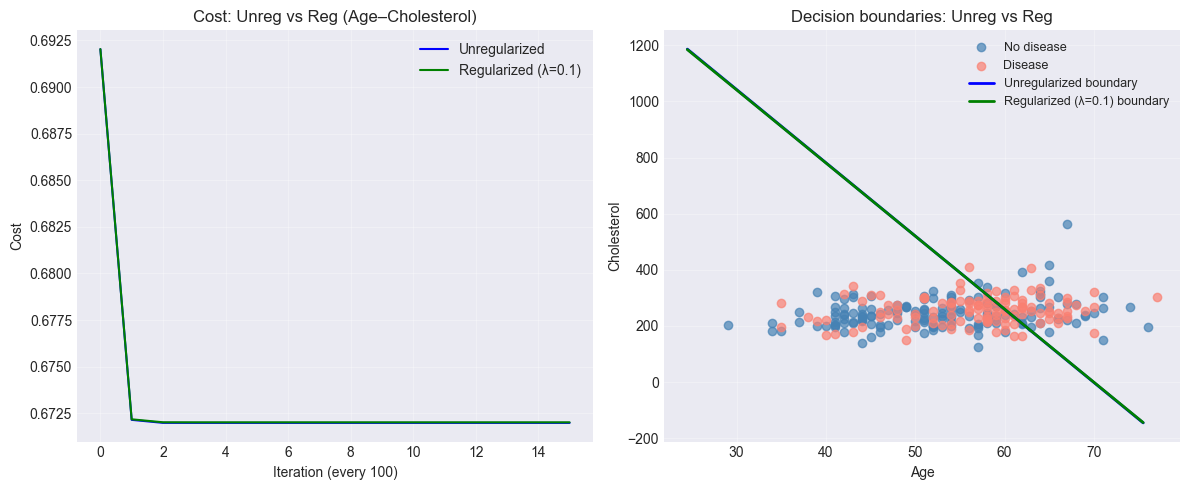

In [67]:
# One pair (Age, Cholesterol): unreg vs reg — costs and boundaries
f1, f2 = 'Age', 'Cholesterol'
X_2d = df[[f1, f2]].values
y_2d = df['Heart Disease'].values
X_tr2, _, y_tr2, _ = train_test_split(X_2d, y_2d, test_size=0.3, random_state=42, stratify=y_2d)
scaler_2d = StandardScaler()
X_tr2_s = scaler_2d.fit_transform(X_tr2)

lam_reg = 0.1
w_u = np.zeros(2); b_u = 0.0
w_r = np.zeros(2); b_r = 0.0
w_u, b_u, costs_u = gradient_descent(X_tr2_s, y_tr2, w_u, b_u, 0.1, 1500)
w_r, b_r, costs_r = gradient_descent_l2(X_tr2_s, y_tr2, w_r, b_r, 0.1, 1500, lam_reg)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(costs_u, label='Unregularized', color='blue')
axes[0].plot(costs_r, label=f'Regularized (λ={lam_reg})', color='green')
axes[0].set_xlabel('Iteration (every 100)')
axes[0].set_ylabel('Cost')
axes[0].set_title('Cost: Unreg vs Reg (Age–Cholesterol)')
axes[0].legend(); axes[0].grid(True, alpha=0.3)

s1_min, s1_max = X_tr2_s[:, 0].min() - 0.5, X_tr2_s[:, 0].max() + 0.5
s1_line = np.linspace(s1_min, s1_max, 200)
def get_boundary_xy(w, b, scaler):
    s2 = -(w[0] * s1_line + b) / w[1] if np.abs(w[1]) > 1e-8 else np.full_like(s1_line, X_2d[:, 1].mean())
    return s1_line * scaler.scale_[0] + scaler.mean_[0], s2 * scaler.scale_[1] + scaler.mean_[1]
x1_u, x2_u = get_boundary_xy(w_u, b_u, scaler_2d)
x1_r, x2_r = get_boundary_xy(w_r, b_r, scaler_2d)
ax = axes[1]
mask0 = y_2d == 0; mask1 = y_2d == 1
ax.scatter(X_2d[mask0, 0], X_2d[mask0, 1], c='steelblue', label='No disease', alpha=0.7)
ax.scatter(X_2d[mask1, 0], X_2d[mask1, 1], c='salmon', label='Disease', alpha=0.7)
ax.plot(x1_u, x2_u, 'b-', lw=2, label='Unregularized boundary')
ax.plot(x1_r, x2_r, 'g-', lw=2, label=f'Regularized (λ={lam_reg}) boundary')
ax.set_xlabel(f1); ax.set_ylabel(f2)
ax.set_title('Decision boundaries: Unreg vs Reg')
ax.legend(loc='best', fontsize=9); ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Step 4 summary

**Reporting:** The λ–metrics table and the printed line above give the **Optimal λ=[val] improves [metric] by [val]%** conclusion (e.g. *"Optimal λ=0.01 improves Acc_test by 2.50%"*). The plots show cost curves and decision boundaries for one pair (Age–Cholesterol): unregularized vs regularized. Lower ||w|| with regularization indicates smaller coefficients and reduced overfitting.

## Step 5: SageMaker Deployment Attempt

I attempted to deploy the model to AWS SageMaker. The flow consisted of:

1. **Export** the model artifacts (weights \(w\), bias \(b\), scaler, and feature list) to the `model_export/` folder.
2. **Package** the inference script (`inference.py`) together with those artifacts into a `model.tar.gz` file ready for SageMaker.
3. **Upload** `model.tar.gz` to an S3 bucket and register the model in SageMaker.

When I tried to create the **endpoint configuration** in the SageMaker console, **I could not complete the deployment due to insufficient permissions**: the lab IAM policy explicitly denied the action `sagemaker:CreateEndpointConfig`. I registered the model in the cloud and uploaded the artifact to S3. See `README.md`.

In [ ]:
# Export model artifacts for SageMaker
import os
import joblib

os.makedirs("model_export", exist_ok=True)
np.save(os.path.join("model_export", "w.npy"), w)
np.save(os.path.join("model_export", "b.npy"), np.array(b))
joblib.dump(scaler, os.path.join("model_export", "scaler.joblib"))
with open(os.path.join("model_export", "selected_features.txt"), "w") as f:
    f.write("\n".join(selected_features))
print("Artifacts exported to model_export/: w.npy, b.npy, scaler.joblib, selected_features.txt")

In [ ]:
# Package model_export/ + inference.py into model.tar.gz (SageMaker format)
import tarfile

with tarfile.open("model.tar.gz", "w:gz") as tar:
    for name in os.listdir("model_export"):
        path = os.path.join("model_export", name)
        tar.add(path, arcname=os.path.join("code", name))
    tar.add("inference.py", arcname=os.path.join("code", "inference.py"))
print("model.tar.gz created (code/ with artifacts + inference.py).")

### Deployment attempt outcome

- I uploaded the **model.tar.gz** file to the S3 bucket (see screenshots `img/tar.png` / `img/sagemaker.png`).
- I registered the **Heart-disease** model in SageMaker with the scikit-learn image and the S3 artifact location (`img/model.png`).
- When I tried to create the endpoint, I got an **AccessDeniedException** because an IAM policy denies `sagemaker:CreateEndpointConfig` (`img/error.png`).

I could not complete full deployment due to permission restrictions in the environment.